In [1]:
import pynbody as pb
import numpy as np
import pandas as pd
import glob
import os
import h5py
import tables
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import os
from natsort import natsorted
import importlib.util
import sys
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

In [2]:
halo_trace_files="/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.trace_back2.hdf5"
mainhaloid = pd.read_hdf(halo_trace_files, index_col=0)


In [3]:
mainhaloid

,004032,003936,003840,003744,003648,003606,003552,003456,003360,003264,...,000347,000288,000275,000225,000192,000188,000139,000107,000096,000071
004096,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,27,31,-1,-1,NaN


In [4]:
mainhaloid
snapshot=4032
value = mainhaloid[f"{snapshot:06d}"].iloc[0]

In [5]:
file_path = '/home/takeichi/MAP/Juan_startrace/methods/src/jstreams/star_trace.py'
module_name = 'star_trace'

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

In [6]:
simname = 'h329'
res = '100'  # The Near Mint runs
#res = 'Mint'  # The MintPermissionError: file ``/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/h329.cosmo50PLK.3072gst5HbwK1BH.4096.trace_back.hdf5`` exists but it can not be read
simpath = '/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/'
basename = 'h329.cosmo50PLK.3072gst5HbwK1BH'
ss_dir = 'snapshots_200crit_h329/'
sim_base = simpath + ss_dir
ss_z0 = sim_base + basename + '.004096'

# Where to save the resulting data
data_folder = '/home/takeichi/MAP/Datafiles/stellarhalo_trace6'

In [7]:
halo_trace_files = sorted(glob.glob(simpath+ss_dir+basename+'.????.trace_back.hdf5'))
haloidlist = pd.read_hdf(halo_trace_files[-1], index_col=0)
haloidlist

,004032,003936,003840,003744,003648,003606,003552,003456,003360,003264,...,000347,000288,000275,000225,000192,000188,000139,000107,000096,000071
004096,,,,,,,,,,,,,,,,,,,,,
115,116,116,116,121,119,120,121,118,113,112,...,64,-1,-1,-1,-1,-1,-1,-1,-1,-1
117,119,119,122,123,122,124,125,126,128,128,...,23,20,19,17,13,14,11,-1,-1,-1
1308,1278,1113,913,987,882,883,874,850,829,792,...,58,61,67,91,67,63,-1,-1,-1,-1
154,154,151,151,151,154,151,149,150,151,148,...,61,58,57,62,54,50,41,-1,-1,-1
37,33,28,23,22,25,24,25,25,25,27,...,84,90,78,69,50,48,62,-1,-1,-1
631,593,391,377,375,372,368,365,366,353,342,...,99,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,7,6,6,6,5,5,5,5,5,5,...,21,18,21,21,19,19,29,-1,-1,-1
859,744,682,665,659,637,630,620,602,573,467,...,69,59,63,61,52,52,47,-1,-1,-1


In [8]:
halo_id=631
snapshot=3936
haloidlist.loc[halo_id, f"{snapshot:06d}"]

np.int64(391)

In [9]:
pb.config['halo-class-priority'] = ['HaloNumberCatalogue', 'AHFCatalogue',
  'AmigaGrpCatalogue',
  'VelociraptorCatalogue',
  'SubFindHDFHaloCatalogue',
  'RockstarCatalogue', 
  'SubfindCatalogue',
  'NewAdaptaHOPCatalogue',
  'NewAdaptaHOPCatalogueFullyLongInts',
  'AdaptaHOPCatalogue',
  'HOPCatalogue',
  'Gadget4SubfindHDFCatalogue',
  'ArepoSubfindHDFCatalogue',
  'TNGSubfindHDFCatalogue']

In [11]:
datapath_halo1='/data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/'
# define a function to give the halo data at a certain snapshot
def com_main_halo(snapshot):
    try:
        snapshot_num = int(snapshot)
        halodata=pb.load(f"{datapath_halo1}h329.cosmo50PLK.3072gst5HbwK1BH.{snapshot_num:06d}")
    except Exception as e:
        print(f"file cannot be loaded, {e}")
    boxcen = halodata.properties['boxsize'].in_units('kpc a')/2
    if snapshot == 4096:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        x_org=h[1].properties['Xc']
        y_org=h[1].properties['Yc']
        z_org=h[1].properties['Zc']        
        x,y,z=(x_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(y_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(z_org/halodata.properties['h']-boxcen)*halodata.properties['a']
    else:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        x_org=h[mainhaloid[f"{snapshot:06d}"].iloc[0]].properties['Xc']
        y_org=h[mainhaloid[f"{snapshot:06d}"].iloc[0]].properties['Yc']
        z_org=h[mainhaloid[f"{snapshot:06d}"].iloc[0]].properties['Zc']  
        x,y,z=(x_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(y_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(z_org/halodata.properties['h']-boxcen)*halodata.properties['a']
    return x,y,z

In [12]:
def Rvir_halo(snapshot, haloid):
    try:
        haloid=int(haloid)
        snapshot_num = int(snapshot)
        halodata=pb.load(f"{datapath_halo1}h329.cosmo50PLK.3072gst5HbwK1BH.{snapshot_num:06d}")
    except Exception as e:
        print(f"file cannot be loaded, {e}")
    if snapshot==4096:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        Rvir=h[haloid].properties['Rvir']/halodata.properties['h']*halodata.properties['a'] 
    else:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        Rvir=h[haloidlist.loc[haloid, f"{snapshot:06d}"]].properties['Rvir']/halodata.properties['h']*halodata.properties['a']       
    return Rvir

In [14]:
def COM_halo(snapshot, haloid, haloidlist):
    try:
        haloid=int(haloid)
        snapshot_num = int(snapshot)
        halodata=pb.load(f"{datapath_halo1}h329.cosmo50PLK.3072gst5HbwK1BH.{snapshot_num:06d}")
    except Exception as e:
        print(f"file cannot be loaded, {e}")
    boxcen = halodata.properties['boxsize'].in_units('kpc a')/2
    #print(halodata.properties['h'])
    #print(halodata.properties['a'])
    if snapshot==4096:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        x_org=h[haloid].properties['Xc']
        y_org=h[haloid].properties['Yc']
        z_org=h[haloid].properties['Zc']
        x,y,z=x_org/halodata.properties['h']-boxcen,y_org/halodata.properties['h']-boxcen,z_org/halodata.properties['h']-boxcen
        x,y,z=(x_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(y_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(z_org/halodata.properties['h']-boxcen)*halodata.properties['a']
    else:
        #halodata.physical_units()
        h=halodata.halos(halo_numbers='v1')
        x_org=h[haloidlist.loc[haloid, f"{snapshot:06d}"]].properties['Xc']
        y_org=h[haloidlist.loc[haloid, f"{snapshot:06d}"]].properties['Yc']
        z_org=h[haloidlist.loc[haloid, f"{snapshot:06d}"]].properties['Zc']
        x,y,z=x_org/halodata.properties['h']-boxcen,y_org/halodata.properties['h']-boxcen,z_org/halodata.properties['h']-boxcen
        x,y,z=(x_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(y_org/halodata.properties['h']-boxcen)*halodata.properties['a'],(z_org/halodata.properties['h']-boxcen)*halodata.properties['a']
    return x,y,z

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load 

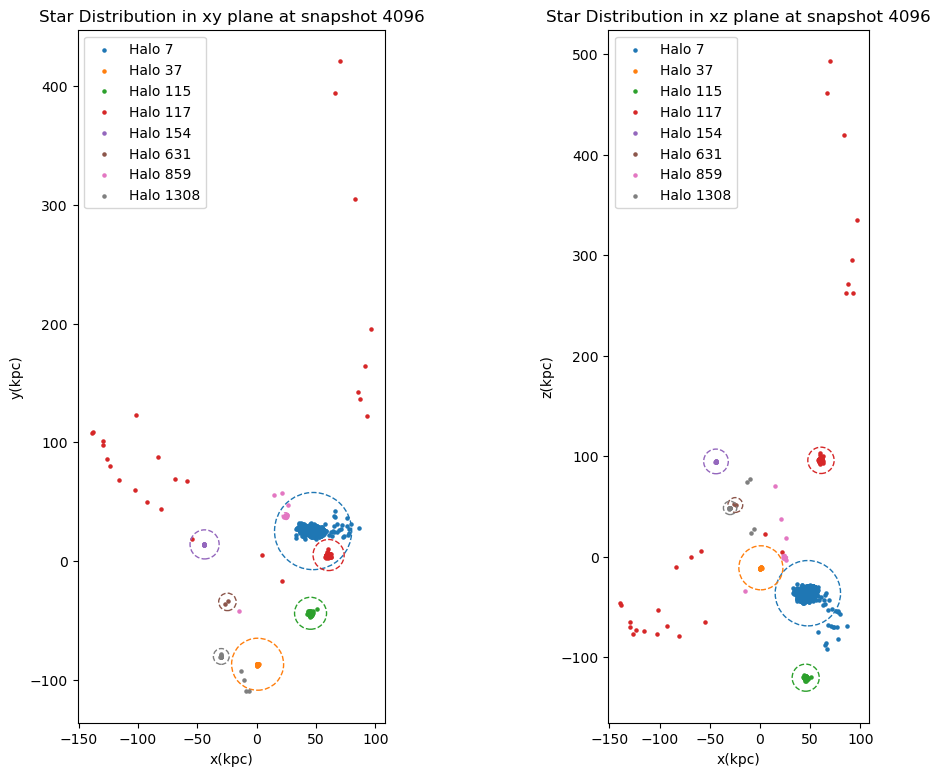

In [65]:
csv_path=os.path.join(data_folder, "halo_star_coordinates.csv")

try:
    df=pd.read_csv(csv_path)
    df['x'] = df['x'].apply(ast.literal_eval)
    df['y'] = df['y'].apply(ast.literal_eval)
    df['z'] = df['z'].apply(ast.literal_eval)
except Exception as e:
    print(f"file loading error, {e}")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 9))
for halo_id in df["halo_id"].unique():
    sub = df[df["halo_id"] == halo_id]
    for snapshot in sorted(sub["snapshot"].unique(), key=int):
        if snapshot == 4096:
            x1,y1,z1=com_main_halo(snapshot)
            sub_snap=sub[sub["snapshot"] == snapshot]
            xstar=sub_snap["x"].values[0]
            ystar=sub_snap["y"].values[0]
            zstar=sub_snap["z"].values[0]
            x_com,y_com,z_com=COM_halo(snapshot, halo_id, haloidlist)

            scatter=axes[0].scatter(np.array(xstar)-x1, np.array(ystar)-y1, s=5, label=f"Halo {halo_id}")
            plot_color = scatter.get_facecolor()[0]
            circle0 = patches.Circle(xy=(x_com-x1,y_com-y1), radius=Rvir_halo(snapshot, halo_id), fill=False, ec=plot_color, lw=1, linestyle='--')
            axes[0].add_patch(circle0)
            axes[0].set_aspect('equal')

            scatter1=axes[1].scatter(np.array(xstar)-x1, np.array(zstar)-z1, s=5, label=f"Halo {halo_id}")
            plot_color1 = scatter1.get_facecolor()[0]
            circle1 = patches.Circle(xy=(x_com-x1,z_com-z1), radius=Rvir_halo(snapshot, halo_id), fill=False, ec=plot_color1, lw=1, linestyle='--')
            axes[1].add_patch(circle1)
            axes[1].set_aspect('equal')
axes[0].set_xlabel("x(kpc)")
axes[0].set_ylabel("y(kpc)")
axes[1].set_xlabel("x(kpc)")
axes[1].set_ylabel("z(kpc)")

axes[0].set_title("Star Distribution in xy plane at snapshot 4096")
axes[0].legend()
axes[1].set_title("Star Distribution in xz plane at snapshot 4096")
axes[1].legend()

plt.savefig('StarDist_004096.png')
plt.show()

In [15]:
csv_path=os.path.join(data_folder, "halo_star_coordinates.csv")
output_dir=os.path.join(data_folder, "stardistribution")
os.makedirs(output_dir, exist_ok=True)

try:
    df=pd.read_csv(csv_path)
    df['x'] = df['x'].apply(ast.literal_eval)
    df['y'] = df['y'].apply(ast.literal_eval)
    df['z'] = df['z'].apply(ast.literal_eval)
except Exception as e:
    print(f"file loading error, {e}")




for snapshot in df["snapshot"].unique()[::-1]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 9))
    sub = df[df["snapshot"] == snapshot]
    x1,y1,z1=com_main_halo(snapshot)
    for halo_id in sorted(sub["halo_id"].unique(), key=int):
        sub_halo=sub[sub["halo_id"] == halo_id]
        xstar=sub_halo["x"].values[0]
        ystar=sub_halo["y"].values[0]
        zstar=sub_halo["z"].values[0]
        
        
        x_com,y_com,z_com=COM_halo(snapshot, halo_id,haloidlist)

        scatter=axes[0].scatter(np.array(xstar)-x1, np.array(ystar)-y1, s=5, label=f"Halo {halo_id}")
        plot_color = scatter.get_facecolor()[0]
        circle0 = patches.Circle(xy=(x_com-x1,y_com-y1), radius=Rvir_halo(snapshot, halo_id), fill=False, ec=plot_color, lw=1, linestyle='--')
        axes[0].add_patch(circle0)
        axes[0].set_aspect('equal')

        scatter1=axes[1].scatter(np.array(xstar)-x1, np.array(zstar)-z1, s=5, label=f"Halo {halo_id}")
        plot_color1 = scatter1.get_facecolor()[0]
        circle1 = patches.Circle(xy=(x_com-x1,z_com-z1), radius=Rvir_halo(snapshot, halo_id), fill=False, ec=plot_color1, lw=1, linestyle='--')
        axes[1].add_patch(circle1)
        axes[1].set_aspect('equal')
        
    axes[0].set_xlabel("x(kpc)")
    axes[0].set_ylabel("y(kpc)")
    axes[1].set_xlabel("x(kpc)")
    axes[1].set_ylabel("z(kpc)")

    axes[0].set_title(f"Star Distribution in xy plane at snapshot{snapshot}")
    axes[0].legend()
    axes[1].set_title(f"Star Distribution in xz plane at snapshot{snapshot}")
    axes[1].legend()
    filename=f"StarDist_{snapshot:06d}.png"
    plt.savefig(os.path.join(output_dir, filename))
    plt.close(fig)
    print(f"save for {snapshot}")


pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor
pynbody.halo : Unable to load 

save for 4096
save for 4032
save for 3936
save for 3840
save for 3744
save for 3648
save for 3606
save for 3552
save for 3456
save for 3360
save for 3264
save for 3195
save for 3168
save for 3072
save for 2976
save for 2880
save for 2784
save for 2688
save for 2592
save for 2554
save for 2496
save for 2400
save for 2304
save for 2208
save for 2112
save for 2088
save for 2016
save for 1920
save for 1824
save for 1740
save for 1728
save for 1632
save for 1536
save for 1475
save for 1440
save for 1344
save for 1269
save for 1248
save for 1152
save for 1106
save for 1056
save for 974
save for 960
save for 864
save for 776
save for 768
save for 672
save for 637
save for 576
save for 480
save for 456
save for 384
save for 347
